In [116]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from hmmlearn import hmm
from torch.distributions import uniform

import sys
sys.path.append("../")

# Hmm Learn 

In [3]:
np.random.seed(42)

In [9]:
model = hmm.GaussianHMM(n_components=3, covariance_type="full")
model.startprob_ = np.array([0.6, 0.3, 0.1])
model.transmat_ = np.array([[0.7, 0.2, 0.1],
                            [0.3, 0.5, 0.2],
                            [0.3, 0.3, 0.4]])

model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, -5.0]])
model.covars_ = np.tile(np.identity(2), (3, 1,1))


In [10]:
X, Z = model.sample(100)

In [11]:
X.shape

(100, 2)

In [12]:
Z.shape

(100,)

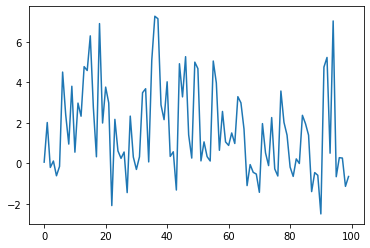

In [16]:
plt.plot(X[:,0])

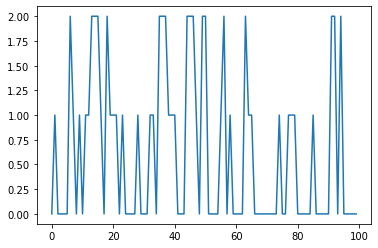

In [14]:
plt.plot(Z)

# Generating Training Data

In [ ]:
#GENERATING A MODEL
np.random.seed(42)


model = hmm.GaussianHMM(n_components=3, covariance_type="full")
model.startprob_ = np.array([0.6, 0.3, 0.1])
model.transmat_ = np.array([[0.7, 0.2, 0.1],
                            [0.3, 0.5, 0.2],
                            [0.3, 0.3, 0.4]])

model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
model.covars_ = np.tile(np.identity(2), (3, 1, 1))


In [21]:
#SAMPLING FROM MODEL and STORING IN TENSOR

#Number of Samples in Dataset
num_samples = 10
length = 100
dataset=[]

for i in range(num_samples):
    X, Z = model.sample(length)
    X = np.reshape(X[:,0],(length,1))
    dataset.append(torch.Tensor(X))
    
dataset = torch.stack(dataset)

In [22]:
dataset.shape

torch.Size([10, 100, 1])

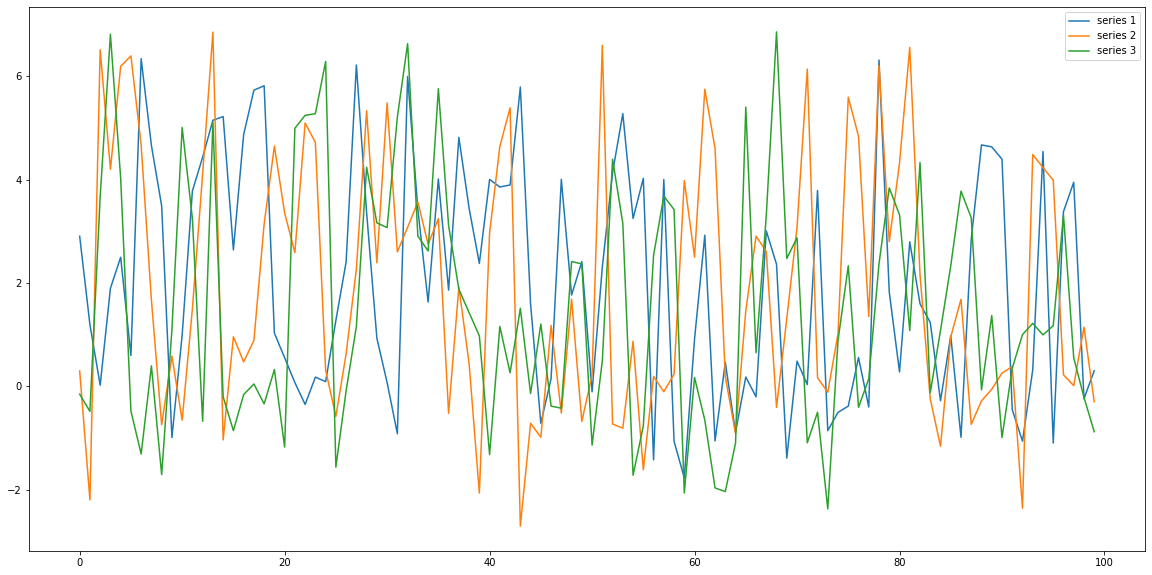

In [23]:
fig = plt.figure()
fig.set_size_inches(20, 10)

for i in range(1,4):
    plt.plot(dataset[i,:,:], label=f"series {i}" )

plt.legend()

In [20]:
##Saving Dataset
torch.save(dataset, 'HMM_dataset.pt')

##To load run:
#torch.load('HMM_dataset.pt')

# Ignore this...

In [101]:
#SAMPLING FROM MODEL and STORING IN TENSOR

#Number of Samples in Dataset
num_samples = 10

dataset_continuous=[]

for i in range(num_samples):
    _, Z = model.sample(100)
    continuous = [np.random.normal(elem, 1.0, 1)[0] for elem in Z]
    continuous = np.reshape(continuous,(100,1))
    dataset_continuous.append(torch.Tensor(continuous))
    
dataset_continuous = torch.stack(dataset_continuous)

In [102]:
dataset_continuous.shape

torch.Size([10, 100, 1])

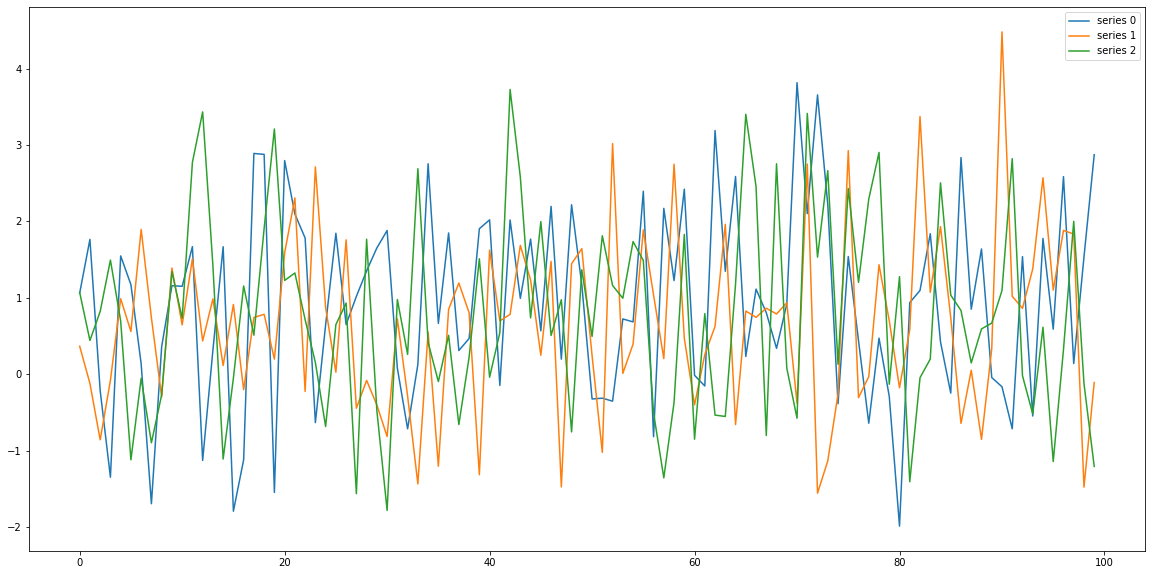

In [106]:
fig = plt.figure()
fig.set_size_inches(20, 10)

for i in range(3):
    plt.plot(dataset_continuous[i,:,:], label=f"series {i}" )

plt.legend()